In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,LSTM

In [ ]:
import os

folder_path = "/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf"

# Recursively search for EDF files in all subdirectories
edf_files = []
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.edf'):
            edf_files.append(os.path.join(root, file))  # Store full file path

print("Total EDF Files Found:", len(edf_files))
print("EDF Files:", edf_files)  # Display all found EDF file paths


Total EDF Files Found: 690
EDF Files: ['/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_5.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_2.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_1.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_2.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_1.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_3.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_7.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_0.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_8.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_0.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_6.edf', '/content/drive/MyDrive/Colab Not

In [ ]:
!pip install mne
import mne

edf_path = edf_files[0]  # First EDF file

try:
    raw = mne.io.read_raw_edf(edf_path, preload=True)
    print("✅ Successfully Loaded with MNE!")
    print("Channels:", raw.info['ch_names'])
    print("Sampling Rate:", raw.info['sfreq'])
except Exception as e:
    print("❌ MNE also failed to read the file:", e)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.5 MB/s eta 0:00:00
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
✅ Successfully Loaded with MNE!
Channels: ['COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 'SYNC', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_CMS', 'CQ_DRL']
Sampling Rate: 128.0


In [ ]:
import numpy as np
import pandas as pd

# Get data as a NumPy array (shape: [n_channels, n_samples])
data, times = raw.get_data(return_times=True)

# Convert to DataFrame
df = pd.DataFrame(data.T, columns=raw.ch_names)
df["Time (s)"] = times  # Add time column

# Display first few rows
print(df.head())


    COUNTER  INTERPOLATED       AF3        F7        F3  ...  CQ_F8  CQ_AF4  CQ_CMS  CQ_DRL  Time (s)
0  0.000059           0.0  0.004218  0.004222  0.004210  ...    0.0     0.0     0.0     0.0  0.000000
1  0.000060           0.0  0.004228  0.004230  0.004229  ...    0.0     0.0     0.0     0.0  0.007812
2  0.000061           0.0  0.004231  0.004241  0.004222  ...    0.0     0.0     0.0     0.0  0.015625
3  0.000062           0.0  0.004236  0.004249  0.004228  ...    0.0     0.0     0.0     0.0  0.023438
4  0.000063           0.0  0.004244  0.004246  0.004245  ...    0.0     0.0     0.0     0.0  0.031250

[5 rows x 40 columns]


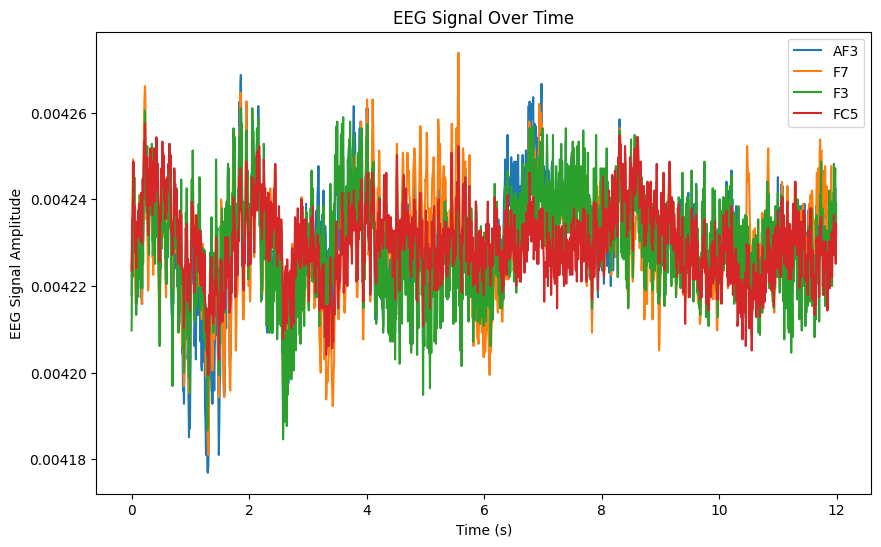

In [ ]:
import matplotlib.pyplot as plt
channels_to_plot = ["AF3", "F7", "F3", "FC5"]

plt.figure(figsize=(10, 6))
for ch in channels_to_plot:
    plt.plot(times, df[ch], label=ch)

plt.xlabel("Time (s)")
plt.ylabel("EEG Signal Amplitude")
plt.title("EEG Signal Over Time")
plt.legend()
plt.show()


In [ ]:
df.to_csv("eeg_data.csv", index=False)
print("✅ EEG data saved as eeg_data.csv")

✅ EEG data saved as eeg_data.csv


In [ ]:
import os

folder_path = "/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf"

edf_files = []
for root, dirs, files in os.walk(folder_path):  # Search in subfolders
    for file in files:
        if file.endswith(".edf"):
            edf_files.append(os.path.join(root, file))

print(f"Total EDF Files Found: {len(edf_files)}")
print("Sample Files:", edf_files[:5])  # Show first 5 files


Total EDF Files Found: 690
Sample Files: ['/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_5.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_2.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_1.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_2.edf', '/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_1.edf']


In [ ]:
import os
import mne
import pandas as pd

folder_path = "/content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf"
output_folder = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"
os.makedirs(output_folder, exist_ok=True)

edf_files = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".edf"):
            edf_files.append(os.path.join(root, file))

print(f"Total EDF Files Found: {len(edf_files)}")

for edf_path in edf_files:
    try:
        print(f"Processing: {edf_path}")
        raw = mne.io.read_raw_edf(edf_path, preload=True)
        data, times = raw.get_data(return_times=True)
        df = pd.DataFrame(data.T, columns=raw.ch_names)
        df["Time (s)"] = times

        # Save CSV
        csv_filename = os.path.splitext(os.path.basename(edf_path))[0] + ".csv"
        csv_path = os.path.join(output_folder, csv_filename)
        df.to_csv(csv_path, index=False)

        print(f"✅ Saved CSV: {csv_path}")

    except Exception as e:
        print(f"❌ Error Processing {edf_path}: {e}")


Total EDF Files Found: 690
Processing: /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_5.edf
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
✅ Saved CSV: /content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs/name0_5.csv
Processing: /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_2.edf
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name10_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
✅ Saved CSV: /content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs/name10_2.csv
Processing: /content/drive/MyDrive/Colab Notebooks/Imagined_speech_EEG_edf/Digit/name0_1.edf
Extracting EDF para

In [ ]:
import random

# Path to processed EEG CSV folder
csv_folder = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"

# List all CSV files
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

if csv_files:
    random_csv = random.choice(csv_files)  # Select a random file
    csv_path = os.path.join(csv_folder, random_csv)
    print(f"✅ Selected File: {random_csv}")
else:
    print("❌ No CSV files found.")


✅ Selected File: name14_M.csv


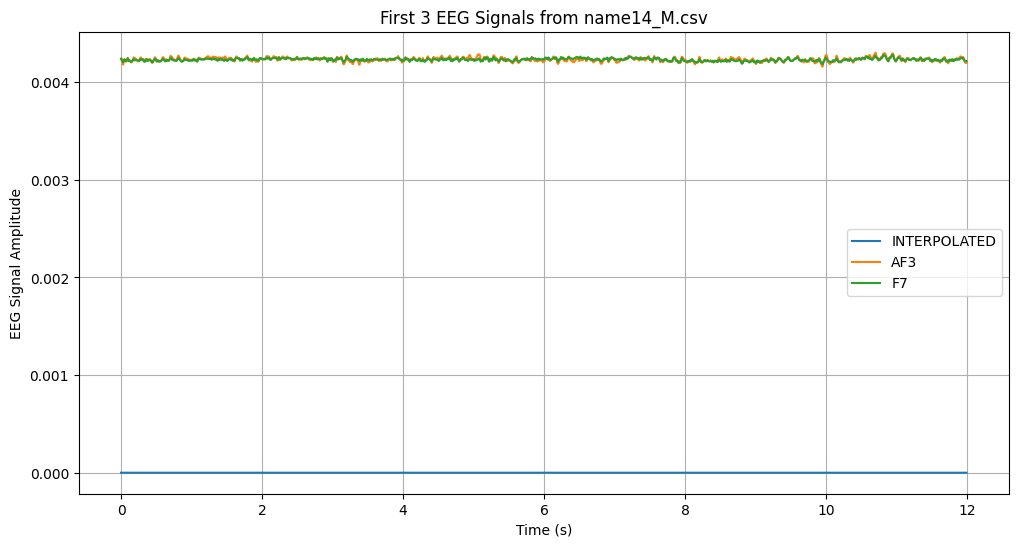

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the random CSV file
df = pd.read_csv(csv_path)

# Extract time and EEG channels
if "Time (s)" in df.columns:
    time = df["Time (s)"]
    eeg_channels = df.columns[1:4]  # First 3 EEG signals
else:
    time = range(len(df))  # Use index as time
    eeg_channels = df.columns[:3]

# Plot the signals
plt.figure(figsize=(12, 6))
for ch in eeg_channels:
    plt.plot(time, df[ch], label=ch)

plt.xlabel("Time (s)")
plt.ylabel("EEG Signal Amplitude")
plt.title(f"First 3 EEG Signals from {random_csv}")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import os
import pandas as pd

# Define the folder containing the EEG files
input_folder = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"  # Change this to the actual folder path
output_folder = "feature_extracted-imagined-speech"  # Change this to the desired output folder

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# List of required columns (modify based on actual column names in EEG files)
required_columns = ["A7", "F7", "F8", "AF3", "AF4", "O1", "O2", "T7", "T8", "P7", "P8"]

# Process each CSV file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        # Load the CSV file
        try:
            df = pd.read_csv(file_path)

            # Select only the required columns (if available in the file)
            df_filtered = df[[col for col in required_columns if col in df.columns]]

            # Handle missing values (optional: fill, drop, etc.)
            df_filtered.dropna(inplace=True)

            # Save the cleaned file
            output_file_path = os.path.join(output_folder, filename)
            df_filtered.to_csv(output_file_path, index=False)
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("Processing complete!")


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name0_5.csv
Processed: name10_2.csv
Processed: name0_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name0_2.csv
Processed: name10_1.csv
Processed: name10_3.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name0_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_0.csv
Processed: name0_8.csv
Processed: name0_0.csv
Processed: name0_6.csv
Processed: name0_3.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name0_9.csv
Processed: name0_4.csv
Processed: name12_3.csv
Processed: name10_5.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_3.csv
Processed: name12_0.csv
Processed: name11_1.csv
Processed: name10_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_2.csv
Processed: name10_8.csv
Processed: name10_4.csv
Processed: name12_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_2.csv
Processed: name10_7.csv
Processed: name11_5.csv
Processed: name12_6.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name11_9.csv
Processed: name10_6.csv
Processed: name11_6.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name11_7.csv
Processed: name12_4.csv
Processed: name12_5.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name11_8.csv
Processed: name11_4.csv
Processed: name11_0.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_8.csv
Processed: name12_9.csv
Processed: name14_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name13_9.csv
Processed: name15_0.csv
Processed: name13_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_5.csv
Processed: name13_1.csv
Processed: name14_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name13_7.csv
Processed: name14_7.csv
Processed: name13_5.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_2.csv
Processed: name14_6.csv
Processed: name12_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name13_4.csv
Processed: name12_8.csv
Processed: name13_6.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_0.csv
Processed: name13_2.csv
Processed: name14_4.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name13_3.csv
Processed: name14_3.csv
Processed: name13_0.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name15_9.csv
Processed: name16_1.csv
Processed: name16_4.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_2.csv
Processed: name16_0.csv
Processed: name16_5.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_2.csv
Processed: name15_6.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name15_5.csv
Processed: name16_6.csv
Processed: name15_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_7.csv
Processed: name15_8.csv
Processed: name16_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name15_4.csv
Processed: name15_7.csv
Processed: name15_2.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name17_0.csv
Processed: name16_3.csv
Processed: name15_3.csv
Processed: name16_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name17_3.csv
Processed: name17_1.csv
Processed: name19_0.csv
Processed: name19_1.csv
Processed: name17_6.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_0.csv
Processed: name17_7.csv
Processed: name19_6.csv
Processed: name19_4.csv
Processed: name19_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_1.csv
Processed: name19_7.csv
Processed: name1_5.csv
Processed: name17_9.csv
Processed: name19_2.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name17_4.csv
Processed: name19_9.csv
Processed: name1_3.csv
Processed: name1_2.csv
Processed: name17_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name19_5.csv
Processed: name1_4.csv
Processed: name17_5.csv
Processed: name19_3.csv
Processed: name21_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_6.csv
Processed: name20_1.csv
Processed: name1_6.csv
Processed: name21_6.csv
Processed: name21_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_8.csv
Processed: name20_5.csv
Processed: name21_5.csv
Processed: name20_4.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_2.csv
Processed: name1_9.csv
Processed: name21_0.csv
Processed: name1_7.csv
Processed: name20_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_3.csv
Processed: name20_9.csv
Processed: name20_0.csv
Processed: name21_4.csv
Processed: name21_2.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_8.csv
Processed: name21_3.csv
Processed: name23_1.csv
Processed: name23_6.csv
Processed: name24_0.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name23_8.csv
Processed: name22_3.csv
Processed: name24_1.csv
Processed: name23_4.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name23_7.csv
Processed: name22_5.csv
Processed: name23_2.csv
Processed: name21_9.csv
Processed: name23_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name22_2.csv
Processed: name22_7.csv
Processed: name22_8.csv
Processed: name22_0.csv
Processed: name22_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name22_4.csv
Processed: name22_1.csv
Processed: name22_6.csv
Processed: name23_5.csv
Processed: name21_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name23_0.csv
Processed: name23_3.csv
Processed: name24_5.csv
Processed: name4_3.csv
Processed: name24_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_4.csv
Processed: name3_9.csv
Processed: name3_4.csv
Processed: name4_1.csv
Processed: name24_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_0.csv
Processed: name24_4.csv
Processed: name24_6.csv
Processed: name4_2.csv
Processed: name3_3.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name3_5.csv
Processed: name3_0.csv
Processed: name3_2.csv
Processed: name24_3.csv
Processed: name3_6.csv
Processed: name24_2.csv
Processed: name3_8.csv
Processed: name3_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name24_8.csv
Processed: name3_7.csv
Processed: name6_6.csv
Processed: name6_4.csv
Processed: name6_2.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name5_3.csv
Processed: name4_5.csv
Processed: name5_2.csv
Processed: name4_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_7.csv
Processed: name5_4.csv
Processed: name5_1.csv
Processed: name6_5.csv
Processed: name6_1.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name5_5.csv
Processed: name5_7.csv
Processed: name6_3.csv
Processed: name5_6.csv
Processed: name6_0.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_9.csv
Processed: name4_6.csv
Processed: name5_0.csv
Processed: name5_9.csv
Processed: name5_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name7_2.csv
Processed: name6_9.csv
Processed: name7_4.csv
Processed: name8_4.csv
Processed: name7_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_6.csv
Processed: name8_5.csv
Processed: name8_9.csv
Processed: name7_6.csv
Processed: name8_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_7.csv
Processed: name8_1.csv
Processed: name7_1.csv
Processed: name6_7.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name7_8.csv
Processed: name7_0.csv
Processed: name7_5.csv
Processed: name7_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_2.csv
Processed: name8_0.csv
Processed: name7_3.csv
Processed: name8_3.csv
Processed: name6_8.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_1.csv
Processed: name9_7.csv
Processed: name9_6.csv
Processed: name9_9.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_4.csv
Processed: name9_8.csv
Processed: name9_3.csv
Processed: name9_0.csv
Processed: name9_2.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_5.csv
Processed: name10_A.csv
Processed: name0_H.csv
Processed: name0_C.csv
Processed: name0_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name0_F.csv
Processed: name0_A.csv
Processed: name0_T.csv
Processed: name0_J.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_J.csv
Processed: name0_M.csv
Processed: name10_H.csv
Processed: name0_P.csv
Processed: name0_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_F.csv
Processed: name10_C.csv
Processed: name11_J.csv
Processed: name12_P.csv
Processed: name11_C.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_C.csv
Processed: name12_A.csv
Processed: name12_H.csv
Processed: name10_M.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_H.csv
Processed: name12_M.csv
Processed: name10_T.csv
Processed: name11_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_F.csv
Processed: name12_J.csv
Processed: name11_P.csv
Processed: name11_T.csv
Processed: name10_P.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_A.csv
Processed: name10_Y.csv
Processed: name10_S.csv
Processed: name11_Y.csv
Processed: name11_M.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_F.csv
Processed: name13_A.csv
Processed: name13_C.csv
Processed: name12_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name13_J.csv
Processed: name12_Y.csv
Processed: name14_M.csv
Processed: name14_H.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name14_T.csv
Processed: name13_H.csv
Processed: name14_S.csv
Processed: name13_F.csv
Processed: name13_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name14_F.csv
Processed: name13_P.csv
Processed: name13_T.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_J.csv
Processed: name14_C.csv
Processed: name13_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_A.csv
Processed: name13_M.csv
Processed: name12_T.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name14_P.csv
Processed: name15_A.csv
Processed: name16_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_P.csv
Processed: name16_T.csv
Processed: name15_H.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name15_S.csv
Processed: name16_H.csv
Processed: name15_P.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name15_C.csv
Processed: name14_Y.csv
Processed: name15_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_C.csv
Processed: name16_J.csv
Processed: name15_T.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_M.csv
Processed: name15_M.csv
Processed: name16_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_F.csv
Processed: name15_Y.csv
Processed: name15_J.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_F.csv
Processed: name18_C.csv
Processed: name18_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name18_F.csv
Processed: name17_C.csv
Processed: name18_T.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_P.csv
Processed: name18_J.csv
Processed: name18_H.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_H.csv
Processed: name17_T.csv
Processed: name18_M.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_A.csv
Processed: name17_Y.csv
Processed: name18_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_J.csv
Processed: name18_P.csv
Processed: name18_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_S.csv
Processed: name16_Y.csv
Processed: name17_M.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_A.csv
Processed: name1_H.csv
Processed: name19_T.csv
Processed: name19_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name19_J.csv
Processed: name1_P.csv
Processed: name19_M.csv
Processed: name1_S.csv
Processed: name19_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_M.csv
Processed: name1_T.csv
Processed: name1_F.csv
Processed: name1_J.csv
Processed: name19_C.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name1_Y.csv
Processed: name19_Y.csv
Processed: name20_A.csv
Processed: name19_S.csv
Processed: name19_H.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_C.csv
Processed: name19_P.csv
Processed: name1_C.csv
Processed: name20_J.csv
Processed: name21_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name21_A.csv
Processed: name20_H.csv
Processed: name20_T.csv
Processed: name20_Y.csv
Processed: name20_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name20_M.csv
Processed: name20_S.csv
Processed: name20_P.csv
Processed: name21_C.csv
Processed: name21_H.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name22_C.csv
Processed: name22_S.csv
Processed: name21_T.csv
Processed: name22_M.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name22_J.csv
Processed: name21_Y.csv
Processed: name21_M.csv
Processed: name2_H.csv
Processed: name21_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name21_J.csv
Processed: name2_C.csv
Processed: name22_Y.csv
Processed: name22_T.csv
Processed: name22_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name2_F.csv
Processed: name22_H.csv
Processed: name21_P.csv
Processed: name22_A.csv
Processed: name2_J.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name2_A.csv
Processed: name22_P.csv
Processed: name3_Y.csv
Processed: name2_S.csv
Processed: name3_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name2_M.csv
Processed: name2_P.csv
Processed: name2_T.csv
Processed: name3_P.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_F.csv
Processed: name3_J.csv
Processed: name3_S.csv
Processed: name4_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_C.csv
Processed: name4_H.csv
Processed: name3_C.csv
Processed: name4_M.csv
Processed: name2_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name3_H.csv
Processed: name3_T.csv
Processed: name4_J.csv
Processed: name3_M.csv
Processed: name3_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_T.csv
Processed: name5_J.csv
Processed: name6_H.csv
Processed: name5_S.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name6_F.csv
Processed: name5_P.csv
Processed: name5_M.csv
Processed: name4_S.csv
Processed: name6_P.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name5_F.csv
Processed: name5_T.csv
Processed: name5_H.csv
Processed: name4_Y.csv
Processed: name6_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name6_M.csv
Processed: name4_P.csv
Processed: name6_J.csv
Processed: name5_Y.csv
Processed: name5_C.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name5_A.csv
Processed: name6_C.csv
Processed: name7_S.csv
Processed: name8_F.csv
Processed: name7_A.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_P.csv
Processed: name8_H.csv
Processed: name8_T.csv
Processed: name8_J.csv
Processed: name7_F.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_A.csv
Processed: name8_M.csv
Processed: name6_T.csv
Processed: name6_Y.csv
Processed: name7_J.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name7_P.csv
Processed: name8_S.csv
Processed: name7_H.csv
Processed: name7_T.csv
Processed: name7_C.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name7_Y.csv
Processed: name6_S.csv
Processed: name7_M.csv
Processed: name8_C.csv
Processed: name8_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_M.csv
Processed: name9_F.csv
Processed: name9_A.csv
Processed: name9_J.csv
Processed: name9_Y.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_H.csv
Processed: name9_S.csv
Processed: name9_P.csv
Processed: name9_C.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_T.csv
Processed: name0_Car.csv
Processed: name0_Scooter.csv
Processed: name0_Mobile.csv
Processed: name0_Tiger.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_Apple.csv
Processed: name0_Wallet.csv
Processed: name0_Apple.csv
Processed: name0_Dog.csv
Processed: name0_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name0_Gold.csv
Processed: name0_Watch.csv
Processed: name10_Car.csv
Processed: name11_Car.csv
Processed: name10_Wallet.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_Car.csv
Processed: name11_Rose.csv
Processed: name10_Dog.csv
Processed: name11_Watch.csv
Processed: name10_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_Mobile.csv
Processed: name11_Scooter.csv
Processed: name11_Dog.csv
Processed: name10_Scooter.csv
Processed: name11_Gold.csv
Processed: name12_Gold.csv
Processed: name12_Dog.csv
Processed: name10_Watch.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name10_Tiger.csv
Processed: name11_Wallet.csv
Processed: name11_Apple.csv
Processed: name11_Mobile.csv
Processed: name12_Apple.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name11_Tiger.csv
Processed: name10_Gold.csv
Processed: name13_Apple.csv
Processed: name14_Car.csv
Processed: name13_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name14_Dog.csv
Processed: name13_Tiger.csv
Processed: name12_Scooter.csv
Processed: name12_Mobile.csv
Processed: name13_Wallet.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name14_Gold.csv
Processed: name13_Watch.csv
Processed: name14_Mobile.csv
Processed: name13_Mobile.csv
Processed: name13_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_Rose.csv
Processed: name12_Tiger.csv
Processed: name13_Gold.csv
Processed: name14_Apple.csv
Processed: name13_Scooter.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name12_Wallet.csv
Processed: name13_Dog.csv
Processed: name12_Watch.csv
Processed: name15_Gold.csv
Processed: name16_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name16_Dog.csv
Processed: name14_Watch.csv
Processed: name14_Rose.csv
Processed: name16_Apple.csv
Processed: name15_Dog.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name14_Wallet.csv
Processed: name15_Watch.csv
Processed: name15_Tiger.csv
Processed: name15_Apple.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name15_Car.csv
Processed: name15_scooter.csv
Processed: name15_Wallet.csv
Processed: name14_Tiger.csv
Processed: name14_Scooter.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name15_Mobile.csv
Processed: name15_Rose.csv
Processed: name16_Watch.csv
Processed: name16_Gold.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name16_Scooter.csv
Processed: name16_Rose.csv
Processed: name18_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_Tiger.csv
Processed: name16_Tiger.csv
Processed: name17_Dog.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name16_Wallet.csv
Processed: name16_Mobile.csv
Processed: name18_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_Watch.csv
Processed: name18_Apple.csv
Processed: name18_Gold.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name18_Dog.csv
Processed: name17_Apple.csv
Processed: name17_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_Scooter.csv
Processed: name17_Car.csv
Processed: name17_Gold.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name17_Wallet.csv
Processed: name17_Mobile.csv
Processed: name19_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name1_Apple.csv
Processed: name1_Tiger.csv
Processed: name1_Gold.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name18_Wallet.csv
Processed: name1_Dog.csv
Processed: name19_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name1_Car.csv
Processed: name18_Tiger.csv
Processed: name18_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name1_Mobile.csv
Processed: name19_Dog.csv
Processed: name19_Scooter.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name18_Watch.csv
Processed: name18_Scooter.csv
Processed: name1_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name19_Gold.csv
Processed: name1_Scooter.csv
Processed: name19_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name19_Apple.csv
Processed: name19_Tiger.csv
Processed: name19_Watch.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name19_Wallet.csv
Processed: name21_Rose.csv
Processed: name20_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name20_Gold.csv
Processed: name20_Watch.csv
Processed: name1_Watch.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name21_Wallet.csv
Processed: name20_Dog.csv
Processed: name21_Gold.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name20_Car.csv
Processed: name21_Scooter.csv
Processed: name20_Apple.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


Processed: name21_Apple.csv
Processed: name20_Wallet.csv
Processed: name20_Rose.csv
Processed: name20_Scooter.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name21_Dog.csv
Processed: name20_Tiger.csv
Processed: name21_Mobile.csv
Processed: name21_Tiger.csv
Processed: name1_Wallet.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name21_Car.csv
Processed: name21_Watch.csv
Processed: name22_Apple.csv
Processed: name2_Watch.csv
Processed: name2_Wallet.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name2_Rose.csv
Processed: name22_Watch.csv
Processed: name22_Mobile.csv
Processed: name2_Scooter.csv
Processed: name22_Tiger.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name3_Apple.csv
Processed: name22_Wallet.csv
Processed: name22_Car.csv
Processed: name2_Car.csv
Processed: name2_Apple.csv
Processed: name22_Gold.csv
Processed: name2_Dog.csv
Processed: name2_Mobile.csv
Processed: name22_Dog.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name22_Rose.csv
Processed: name2_Gold.csv
Processed: name2_Tiger.csv
Processed: name22_Scooter.csv
Processed: name3_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_Apple.csv
Processed: name3_Tiger.csv
Processed: name3_Watch.csv
Processed: name3_Dog.csv
Processed: name4_Scooter.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name4_Dog.csv
Processed: name3_Mobile.csv
Processed: name3_Wallet.csv
Processed: name3_Rose.csv
Processed: name4_Tiger.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name5_Apple.csv
Processed: name4_Gold.csv
Processed: name5_Dog.csv
Processed: name5_Car.csv
Processed: name4_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name3_Scooter.csv
Processed: name4_Car.csv
Processed: name4_Wallet.csv
Processed: name4_Watch.csv
Processed: name4_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name3_Gold.csv
Processed: name5_Gold.csv
Processed: name5_Mobile.csv
Processed: name6_Scooter.csv
Processed: name6_Rose.csv
Processed: name6_Wallet.csv
Processed: name5_Scooter.csv
Processed: name7_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name6_Gold.csv
Processed: name5_Rose.csv
Processed: name7_Apple.csv
Processed: name6_Watch.csv
Processed: name6_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name6_Tiger.csv
Processed: name5_Wallet.csv
Processed: name7_Dog.csv
Processed: name6_Dog.csv
Processed: name5_Watch.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name6_Car.csv
Processed: name6_Apple.csv
Processed: name5_Tiger.csv
Processed: name8_Scooter.csv
Processed: name9_Dog.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_Car.csv
Processed: name8_Tiger.csv
Processed: name9_Mobile.csv
Processed: name7_Rose.csv
Processed: name8_Rose.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name7_Wallet.csv
Processed: name8_Watch.csv
Processed: name7_Scooter.csv
Processed: name8_Wallet.csv
Processed: name7_Watch.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_Gold.csv
Processed: name8_Apple.csv
Processed: name9_Apple.csv
Processed: name7_Mobile.csv
Processed: name8_Mobile.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name8_Gold.csv
Processed: name7_Tiger.csv
Processed: name8_Dog.csv
Processed: name7_Gold.csv
Processed: name8_Car.csv


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed: name9_Scooter.csv
Processed: name9_Rose.csv
Processed: name9_Watch.csv
Processed: name9_Tiger.csv
Processed: name9_Wallet.csv
Processing complete!


<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
<ipython-input-27-42d462aacfbd>:27: SettingWithCopyWarning: 
A value is trying to be set on a 

Processed 1/690: name0_5.csv
Processed 2/690: name10_2.csv
Processed 3/690: name0_1.csv
Processed 4/690: name0_2.csv
Processed 5/690: name10_1.csv
Processed 6/690: name10_3.csv
Processed 7/690: name0_7.csv
Processed 8/690: name10_0.csv
Processed 9/690: name0_8.csv
Processed 10/690: name0_0.csv
Processed 11/690: name0_6.csv
Processed 12/690: name0_3.csv
Processed 13/690: name0_9.csv
Processed 14/690: name0_4.csv
Processed 15/690: name12_3.csv
Processed 16/690: name10_5.csv
Processed 17/690: name11_3.csv
Processed 18/690: name12_0.csv
Processed 19/690: name11_1.csv
Processed 20/690: name10_9.csv
Processed 21/690: name12_2.csv
Processed 22/690: name10_8.csv
Processed 23/690: name10_4.csv
Processed 24/690: name12_1.csv
Processed 25/690: name11_2.csv
Processed 26/690: name10_7.csv
Processed 27/690: name11_5.csv
Processed 28/690: name12_6.csv
Processed 29/690: name11_9.csv
Processed 30/690: name10_6.csv
Processed 31/690: name11_6.csv
Processed 32/690: name11_7.csv
Processed 33/690: name12_4.

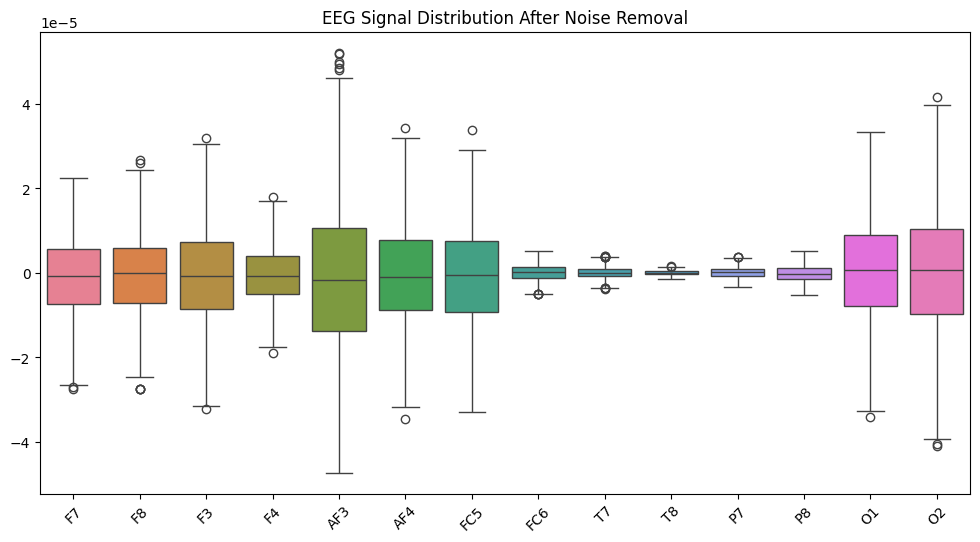

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt

# Define relevant EEG channels for text generation
EEG_CHANNELS = ["F7", "F8", "F3", "F4", "AF3", "AF4", "FC5", "FC6", "T7", "T8", "P7", "P8", "O1", "O2"]

# Noise filtering function (bandpass filter to remove muscle & eye movement noise)
def bandpass_filter(data, lowcut=0.5, highcut=50, fs=256, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Function to process EEG data file
def process_eeg_file(file_path):
    df = pd.read_csv(file_path)

    # Select only relevant EEG channels
    df = df[EEG_CHANNELS]

    # Apply bandpass filter to remove noise
    for channel in EEG_CHANNELS:
        df[channel] = bandpass_filter(df[channel])

    # Remove outliers using IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df

# Process all EEG files in a single directory
def process_all_files(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Ensure output directory exists

    files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

    for i, file in enumerate(files, start=1):
        file_path = os.path.join(input_dir, file)
        processed_df = process_eeg_file(file_path)

        # Save all processed files in the same directory
        output_file_path = os.path.join(output_dir, file)
        processed_df.to_csv(output_file_path, index=False)

        print(f"Processed {i}/{len(files)}: {file}")

# Function to visualize data distribution (box plot)
def plot_boxplot(file_path):
    df = pd.read_csv(file_path)[EEG_CHANNELS]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df)
    plt.xticks(rotation=45)
    plt.title("EEG Signal Distribution After Noise Removal")
    plt.show()

# Example Usage
input_directory = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"
output_directory = "/content/all-preprocessed-eeg"  # Single directory for all processed files
process_all_files(input_directory, output_directory)

# Plot box plot for a sample file
plot_boxplot(os.path.join(output_directory, "name10_2.csv"))


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paths & Parameters
data_directory = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"
batch_size = 32
max_timesteps = 200
EEG_CHANNELS = ["F7", "F8", "F3", "F4", "AF3", "AF4", "FC5", "FC6", "T7", "T8", "P7", "P8", "O1", "O2"]

# Encode labels
label_encoder = LabelEncoder()
all_labels = [file.split("_")[1][0] for file in os.listdir(data_directory) if file.endswith(".csv")]
label_encoder.fit(all_labels)

# Data Generator
def eeg_data_generator(directory, batch_size=32):
    files = [file for file in os.listdir(directory) if file.endswith(".csv")]
    while True:
        np.random.shuffle(files)
        for i in range(0, len(files), batch_size):
            batch_files = files[i:i + batch_size]
            batch_data, batch_labels = [], []

            for file in batch_files:
                file_path = os.path.join(directory, file)
                df = pd.read_csv(file_path)

                # Extract & encode label
                label = file.split("_")[1][0]
                label_encoded = label_encoder.transform([label])[0]

                # Normalize EEG features
                df = df[EEG_CHANNELS]
                df = StandardScaler().fit_transform(df)

                # Pad/Truncate Sequences
                df = pad_sequences(df.T, maxlen=max_timesteps, padding='post', truncating='post', dtype='float32')
                df = df.T

                batch_data.append(df)
                batch_labels.append(label_encoded)

            yield np.array(batch_data), np.array(batch_labels)


# **🔹 Optimized Model**
model = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(max_timesteps, len(EEG_CHANNELS))),
    BatchNormalization(),  # Normalize activations
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Bidirectional(LSTM(100, return_sequences=True)),
    Bidirectional(LSTM(50)),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# **🔹 Compile with Lower LR**
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **🔹 Train Model**
steps_per_epoch = len(os.listdir(data_directory)) // batch_size
model.fit(eeg_data_generator(data_directory, batch_size), epochs=25, steps_per_epoch=steps_per_epoch)

# Save
model.save("optimized_eeg_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0585 - loss: 3.2205
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.0865 - loss: 3.0970
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1323 - loss: 3.0141
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1527 - loss: 2.9379
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2030 - loss: 2.7705
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2322 - loss: 2.6706
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2923 - loss: 2.5036
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3247 - loss: 2.4118
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3573 - loss: 2.2357
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4237 - loss: 2.0620
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4752 - loss: 1.8512
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5652 - lo

In [ ]:
import pandas as pd
import numpy as np

data_file = "/content/processed_eeg.csv"
df = pd.read_csv(data_file)

print(df.shape)  # Check the dimensions
print(df.head())  # Preview the data


(459, 14)
         F7        F8        F3        F4  ...            P7            P8            O1            O2
0  0.000004  0.000004  0.000003  0.000007  ...  1.054426e-06 -2.961302e-07  3.508071e-06 -8.037037e-07
1  0.000002  0.000003  0.000011 -0.000003  ...  9.390947e-06 -2.220368e-06  2.183521e-07 -1.455867e-05
2  0.000011 -0.000001 -0.000002  0.000013  ...  2.532106e-07  1.138541e-05 -3.897376e-06 -6.598132e-06
3  0.000013 -0.000003 -0.000002  0.000014  ...  4.342605e-06  5.884706e-06 -5.103387e-06 -2.913836e-06
4  0.000015 -0.000003  0.000001  0.000008  ...  7.995317e-06  2.893825e-06 -7.590613e-06 -3.885534e-06

[5 rows x 14 columns]


In [ ]:
# Ensure labels exist (if filenames were used previously)
df["label"] = df.index.astype(str)  # Example: Assign row index as a label

# If filenames contain labels like "word_01.csv", extract them
# df["label"] = df["filename_column"].apply(lambda x: x.split("_")[1][0])


In [ ]:
# Extract features (X) and convert to NumPy array
X = df.values  # Take all 14 columns as features
timesteps = X.shape[1]  # Should be 14

# Reshape for Conv1D or LSTM model
X = X.reshape(X.shape[0], timesteps, 1)

# Dummy labels if missing (Replace this with real labels)
y = np.random.randint(0, 10, X.shape[0])  # Example: Random 10-class labels

print("X shape:", X.shape)  # (samples, timesteps, 1)
print("y shape:", y.shape)  # (samples,)


X shape: (459, 15, 1)
y shape: (459,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to numbers

print("Encoded labels:", y_encoded[:5])  # Preview first 5 labels


Encoded labels: [8 3 4 9 7]


In [ ]:
timesteps = 14
features = 14  # Make sure this matches the training data

# Generate a random sample with correct shape
sample = np.random.rand(1, timesteps, features).astype(np.float32)  # Shape: (1, 14, 14)

print("Sample shape before prediction:", sample.shape)  # Should be (1, 14, 14)

# Predict
prediction = model.predict(sample)

# Convert prediction to label
predicted_label = np.argmax(prediction)
predicted_word = label_encoder.inverse_transform([predicted_label])[0]

print("Predicted Label:", predicted_label)
print("Predicted Word:", predicted_word)


Sample shape before prediction: (1, 14, 14)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: 1
Predicted Word: 1


In [ ]:
print(model.input_shape)  # Check what the model expects
print(sample.shape)       # Check your sample shape before prediction


(None, 200, 14)
(1, 14, 14)


In [ ]:
import numpy as np

# Assuming your input EEG signal is (1, 14, 14), pad it to (1, 200, 14)
padded_sample = np.zeros((1, 200, 14))  # Create an array of zeros
padded_sample[:, :14, :] = sample  # Copy existing data into the first 14 time steps

# Now predict using the padded input
prediction = model.predict(padded_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
from scipy.interpolate import interp1d

def interpolate_signal(signal, target_length=200):
    x_old = np.linspace(0, 1, signal.shape[0])  # Original time steps
    x_new = np.linspace(0, 1, target_length)  # New time steps
    interpolator = interp1d(x_old, signal, axis=0, kind='linear')  # Linear interpolation
    return interpolator(x_new)

# Interpolating the EEG signal to (200, 14)
resized_sample = interpolate_signal(sample[0], target_length=200).reshape(1, 200, 14)

# Now predict
prediction = model.predict(resized_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [ ]:
print("Padded Sample Shape:", padded_sample.shape)

Padded Sample Shape: (1, 200, 14)


In [ ]:
prediction = model.predict(padded_sample)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
[[0.00930205 0.01059637 0.01051246 0.03353351 0.05260916 0.00439418
  0.01001354 0.04694669 0.0743883  0.14363942 0.01092529 0.02379655
  0.01491833 0.08768572 0.09962554 0.01646944 0.02396922 0.00463055
  0.00575698 0.27273333 0.00225205 0.00597805 0.01809706 0.01400644
  0.00321984]]


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **🔹 Paths & Parameters**
data_directory = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"
batch_size = 32
max_timesteps = 200
EEG_CHANNELS = ["F7", "F8", "F3", "F4", "AF3", "AF4", "FC5", "FC6", "T7", "T8", "P7", "P8", "O1", "O2"]

# **🔹 Encode labels & Save Label Classes**
label_encoder = LabelEncoder()
all_labels = [file.split("_")[1][0] for file in os.listdir(data_directory) if file.endswith(".csv")]
label_encoder.fit(all_labels)

# Save label classes for future predictions
np.save("label_classes.npy", label_encoder.classes_)

# **🔹 EEG Data Generator for Training**
def eeg_data_generator(directory, batch_size=32):
    files = [file for file in os.listdir(directory) if file.endswith(".csv")]
    while True:
        np.random.shuffle(files)
        for i in range(0, len(files), batch_size):
            batch_files = files[i:i + batch_size]
            batch_data, batch_labels = [], []

            for file in batch_files:
                file_path = os.path.join(directory, file)
                df = pd.read_csv(file_path)

                # Extract & encode label
                label = file.split("_")[1][0]
                label_encoded = label_encoder.transform([label])[0]

                # Normalize EEG features
                df = df[EEG_CHANNELS]
                df = StandardScaler().fit_transform(df)

                # Pad/Truncate Sequences
                df = pad_sequences(df.T, maxlen=max_timesteps, padding='post', truncating='post', dtype='float32')
                df = df.T

                batch_data.append(df)
                batch_labels.append(label_encoded)

            yield np.array(batch_data), np.array(batch_labels)

# **🔹 Define CNN-LSTM Model**
model = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(max_timesteps, len(EEG_CHANNELS))),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Bidirectional(LSTM(100, return_sequences=True)),
    Bidirectional(LSTM(50)),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# **🔹 Compile Model**
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **🔹 Train Model**
steps_per_epoch = len(os.listdir(data_directory)) // batch_size
model.fit(eeg_data_generator(data_directory, batch_size), epochs=25, steps_per_epoch=steps_per_epoch)

# **🔹 Save Model**
model.save("optimized_eeg_model.h5")

print("🎯 Model training completed and saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0375 - loss: 3.2229
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1026 - loss: 3.1015
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1213 - loss: 3.0163
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1895 - loss: 2.8895
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2164 - loss: 2.8012
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2037 - loss: 2.7243
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2779 - loss: 2.5498
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2987 - loss: 2.3701
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3774 - loss: 2.2271
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4261 - loss: 2.0740
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4089 - loss: 1.9881
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5221 - lo

🎯 Model training completed and saved successfully!


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **🔹 Paths & Parameters**
data_directory = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs"
batch_size = 32
max_timesteps = 200
EEG_CHANNELS = ["F7", "F8", "F3", "F4", "AF3", "AF4", "FC5", "FC6", "T7", "T8", "P7", "P8", "O1", "O2"]

# **🔹 Encode labels & Save Label Classes**
label_encoder = LabelEncoder()
all_labels = [file.split("_")[1].split(".")[0] for file in os.listdir(data_directory) if file.endswith(".csv")]
label_encoder.fit(all_labels)

# Save label classes for future predictions
np.save("label_classes.npy", label_encoder.classes_)

# **🔹 EEG Data Generator for Training**
def eeg_data_generator(directory, batch_size=32):
    files = [file for file in os.listdir(directory) if file.endswith(".csv")]
    while True:
        np.random.shuffle(files)
        for i in range(0, len(files), batch_size):
            batch_files = files[i:i + batch_size]
            batch_data, batch_labels = [], []

            for file in batch_files:
                file_path = os.path.join(directory, file)
                df = pd.read_csv(file_path)

                # Extract & encode label
                label = file.split("_")[1].split(".")[0]
                label_encoded = label_encoder.transform([label])[0]

                # Normalize EEG features
                df = df[EEG_CHANNELS]
                df = StandardScaler().fit_transform(df)

                # Pad/Truncate Sequences
                df = pad_sequences(df.T, maxlen=max_timesteps, padding='post', truncating='post', dtype='float32')
                df = df.T

                batch_data.append(df)
                batch_labels.append(label_encoded)

            yield np.array(batch_data), np.array(batch_labels)

# **🔹 Define CNN-LSTM Model**
model = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(max_timesteps, len(EEG_CHANNELS))),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Bidirectional(LSTM(100, return_sequences=True)),
    Bidirectional(LSTM(50)),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# **🔹 Compile Model**
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **🔹 Train Model**
steps_per_epoch = len(os.listdir(data_directory)) // batch_size
model.fit(eeg_data_generator(data_directory, batch_size), epochs=25, steps_per_epoch=steps_per_epoch)

# **🔹 Save Model**
model.save("optimized_eeg_model.h5")

print("🎯 Model training completed and saved successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 757ms/step - accuracy: 0.0232 - loss: 3.4641
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 643ms/step - accuracy: 0.0957 - loss: 3.3424
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 651ms/step - accuracy: 0.0980 - loss: 3.2777
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 689ms/step - accuracy: 0.1240 - loss: 3.1895
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 628ms/step - accuracy: 0.1635 - loss: 3.0757
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 606ms/step - accuracy: 0.2145 - loss: 2.9871
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 603ms/step - accuracy: 0.2894 - loss: 2.7898
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 627ms/step - accuracy: 0.2809 - loss: 2.6779
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 622ms/step - accuracy: 0.3875 - loss: 2.4452
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 616ms/step - accuracy: 0.3723 - loss: 2.3173
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 601ms/step - accuracy: 0.3868 - loss: 2.2014
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 13

🎯 Model training completed and saved successfully!


In [ ]:
# Load the trained model
model = tf.keras.models.load_model("optimized_eeg_model.h5")

# Load the label encoder classes
label_classes = np.load("label_classes.npy", allow_pickle=True)


In [ ]:
def preprocess_eeg_data(file_path, max_timesteps=200):
    df = pd.read_csv(file_path)

    # Extract only EEG channel columns
    df = df[EEG_CHANNELS]

    # Normalize EEG features
    df = StandardScaler().fit_transform(df)

    # Pad/Truncate Sequences
    df = pad_sequences(df.T, maxlen=max_timesteps, padding='post', truncating='post', dtype='float32')
    df = df.T

    return np.expand_dims(df, axis=0)  # Add batch dimension


In [ ]:
# Test EEG file path
test_file = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs/sample_test.csv"

# Preprocess the data
input_data = preprocess_eeg_data(test_file)

# Make Prediction
predictions = model.predict(input_data)

# Get the predicted label
predicted_label = label_classes[np.argmax(predictions)]

print(f"🧠 Predicted Label: {predicted_label}")


In [ ]:
# Test EEG file path
test_file = "/content/name9_M.csv"

# Preprocess the data
input_data = preprocess_eeg_data(test_file)

# Make Prediction
predictions = model.predict(input_data)

# Get the predicted label
predicted_label = label_classes[np.argmax(predictions)]

print(f"🧠 Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🧠 Predicted Label: M


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
model = tf.keras.models.load_model("optimized_eeg_model.h5")
label_classes = np.load("label_classes.npy", allow_pickle=True)

test_data_directory = "/content/drive/MyDrive/Colab Notebooks/Processed_EEG_CSVs/Test_Sessions"

EEG_CHANNELS = ["F7", "F8", "F3", "F4", "AF3", "AF4", "FC5", "FC6", "T7", "T8", "P7", "P8", "O1", "O2"]
max_timesteps = 200
def preprocess_eeg_data(file_path):
    df = pd.read_csv(file_path)
    df = df[EEG_CHANNELS]
    df = StandardScaler().fit_transform(df)
    df = pad_sequences(df.T, maxlen=max_timesteps, padding='post', truncating='post', dtype='float32')
    return np.expand_dims(df.T, axis=0)

eeg_files = sorted([file for file in os.listdir(test_data_directory) if file.endswith(".csv")])
predicted_word = ""

for eeg_file in eeg_files:
    file_path = os.path.join(test_data_directory, eeg_file)
    input_data = preprocess_eeg_data(file_path)
    predictions = model.predict(input_data)
    predicted_letter = label_classes[np.argmax(predictions)]
    predicted_word += predicted_letter

print(f"🧠 Predicted Word: {predicted_word}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
🧠 Predicted Word: AHS
